In [2]:
import os 
#Local Path to modules (PYTHONPATH)
PYLOCAL = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\git' 
os.chdir(PYLOCAL)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import utils.utils as utils; reload(utils)
fsep = False

### Set magnetic configuration

In [20]:
import geometry.w7x.fieldlinetracer as flt; importlib.reload(flt)
tracer = flt.TRACER()
xr = [5.20,5.70]
yr = [-1.05,-0.85]
IP = [13600]*5+[0.]*2
ress = 0.01
phi = -81.
tracer.set_currents(IP)

### Get wall cut

In [5]:
import geometry.w7x.meshsrv as wall; reload(wall); wall = wall.WALL()
wc = wall.cut_wall_phi(phi)

### Make poincare plot

In [6]:
tracer.set_traceinit('lin')
tracer.poincare_phi(phi,steps=100)
res = tracer.trace()

### Get connection length

In [21]:
tracer.clength(res=ress,limit=1.E3,xr=xr,yr=yr,phi=phi,loads=True)
#tracer.set_machine(assembly=[1,2,9,14],mesh=[164])
tracer.set_machine(assembly=[2,5,6,7,9,15,16,17],mesh=[164])
clenf = tracer.trace(inverse=False)
tracer.clength(res=ress,limit=1.E3,xr=xr,yr=yr,phi=phi,loads=True)
clenr = tracer.trace(inverse=True)

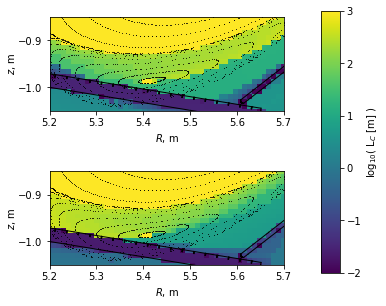

In [22]:
import utils.plot as pu;reload(pu)
fig, axs, col = pu.setax(ny=2,figsize=(5.2,5.2))
ax = axs[0]
fig, im = tracer.plot_clength(clenf,log=True,cm=None,opacity=1.0,zr=[-2.,3.],fig=fig,ax=ax,cb=False)
fig = tracer.plot_poincare(res,color='k',fig=fig,ax=ax)
fig = wall.plot_wall(wc,fig=fig,ax=ax)
ax.set_xlim(xr); ax.set_ylim(yr)
#fig, axs, col = pu.setax(figsize=(5.2,5.2))
ax = axs[1]
fig, im = tracer.plot_clength(clenr,log=True,cm=None,opacity=1.0,zr=[-2.,3.],fig=fig,ax=ax,cb=False)
fig = tracer.plot_poincare(res,color='k',fig=fig,ax=ax)
fig = wall.plot_wall(wc,fig=fig,ax=ax)
ax.set_xlim(xr); ax.set_ylim(yr)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_ylabel('log$_{10}$( L$_C$ [m] )')
plt.show()

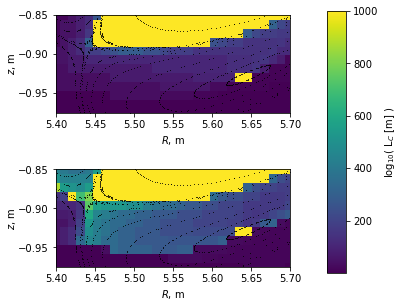

In [9]:
clmin,clmax = tracer.clengthlim(clenf,clenr)
fig, axs, col = pu.setax(ny=2,figsize=(5.2,5.2))
ax = axs[0]
cmin = clmin.l
cmin[np.isnan(cmin)] = -1.
#fig, im = tracer.plot_clengthlim(cmin,log=True,cm=None,opacity=1.0,zr=[-2.,3.],fig=fig,ax=ax,cb=False)
fig, im = tracer.plot_clengthlim(cmin,log=False,cm=None,opacity=1.0,zr=None,fig=fig,ax=ax,cb=False)
fig = tracer.plot_poincare(res,color='k',fig=fig,ax=ax)
#fig = wall.plot_wall(wc,fig=fig,ax=ax)
ax.set_xlim(xr); ax.set_ylim(yr)
ax = axs[1]
cmax = clmax.l
cmax[np.isnan(cmax)] = -1.
#fig, im = tracer.plot_clengthlim(cmax,log=True,cm=None,opacity=1.0,zr=[-2.,3.],fig=fig,ax=ax,cb=False)
fig, im = tracer.plot_clengthlim(cmax,log=False,cm=None,opacity=1.0,zr=None,fig=fig,ax=ax,cb=False)
fig = tracer.plot_poincare(res,color='k',fig=fig,ax=ax)
#fig = wall.plot_wall(wc,fig=fig,ax=ax)
ax.set_xlim(xr); ax.set_ylim(yr)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_ylabel('log$_{10}$( L$_C$ [m] )')
plt.show()

In [276]:
ress = 0.001
tracer.set_currents(IP)
#print(tracer.config.coilsIdsCurrents)
tracer.set_machine(assembly=[2,5,6,7,9,15,16,17],mesh=[164])
tracer.clength(res=ress,limit=1.E3,xr=xr,yr=yr,loads=True)
clenfr = tracer.trace(inverse=False)
tracer.clength(res=ress,limit=1.E3,xr=xr,yr=yr,loads=True)
clenrr = tracer.trace(inverse=True)

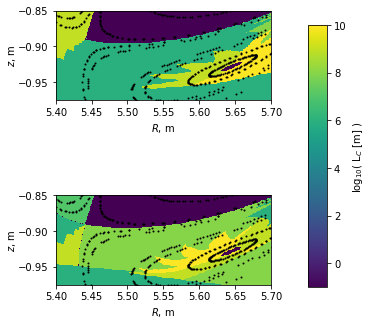

In [280]:
clmin,clmax = tracer.clengthlim(clenfr,clenrr)
fig, axs, col = pu.setax(ny=2,figsize=(5.2,5.2))
ax = axs[0]
cmin = clmin.p
cmin[np.isnan(cmin)] = -1.
#fig, im = tracer.plot_clengthlim(cmin,log=True,cm=None,opacity=1.0,zr=[-2.,3.],fig=fig,ax=ax,cb=False)
fig, im = tracer.plot_clengthlim(cmin,log=False,cm=None,opacity=1.0,zr=None,fig=fig,ax=ax,cb=False)
fig = tracer.plot_poincare(res,color='k',fig=fig,ax=ax)
#fig = wall.plot_wall(wc,fig=fig,ax=ax)
ax.set_xlim(xr); ax.set_ylim(yr)
ax = axs[1]
cmax = clmax.p
cmax[np.isnan(cmax)] = -1.
#fig, im = tracer.plot_clengthlim(cmax,log=True,cm=None,opacity=1.0,zr=[-2.,3.],fig=fig,ax=ax,cb=False)
fig, im = tracer.plot_clengthlim(cmax,log=False,cm=None,opacity=1.0,zr=None,fig=fig,ax=ax,cb=False)
fig = tracer.plot_poincare(res,color='k',fig=fig,ax=ax)
#fig = wall.plot_wall(wc,fig=fig,ax=ax)
ax.set_xlim(xr); ax.set_ylim(yr)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_ylabel('log$_{10}$( L$_C$ [m] )')
plt.show()

### Plot connection length mapping to target

In [ ]:
from mayavi import mlab
fig = mlab.figure()
engine = mlab.get_engine()
fn = '../data/w7x-TBH.mv'
fn = '../data/w7x-TBH-HM1.mv'
engine.load_visualization(fn)
fig = mlab.gcf()

In [ ]:
#loads
#convert clength to rgb colors
x1, x2, x3 = [],[],[]
for item in res:
    for line in item.lines:
        x1.append(line.vertices.x1[-1])
        x2.append(line.vertices.x2[-1])
        x3.append(line.vertices.x3[-1])
print(len(x1))
#Map to HM1
mlab.points3d(x1,x2,x3,color=(1,0,0),scale_factor=1.1)